In [1]:
### SPUSTIT TOHLE NA PC PŘED PRACÍ !!

import os
import sys
import pydicom # type: ignore
import matplotlib.pyplot as plt # type: ignore
import pandas as pd # type: ignore
from glob import glob
from codes.custom_library import Graf_1_2

# Set the working directory to the project directory
device = input("Zadej prosím, na jakém zařízení děláš (mac/doma/prace): ")
if device == "doma":
    project_dir = r"C:/Users/danie/Desktop/mrtva_doba_VU"
    os.chdir(project_dir)
elif device == "mac":
    project_dir = r"/Users/danielptacek/Desktop/mrtva_doba_VU"
    os.chdir(project_dir)
else:
    project_dir = r"U:/Dokumenty/mrtva_doba_VU"
    os.chdir(project_dir)


# Verify the change
print("Current working directory:", os.getcwd()) 

# Ensure the project directory is in sys.path
if project_dir not in sys.path:
    sys.path.append(project_dir)

aktivity = {
    "20240708" : 700.589,
    "20240709" : 640.979,
    "20240710" : 586.294,
    "20240711" : 537.692,
    "20240712" : 495.958,
    "20240714" : 404.370,
    "20240715" : 379.365,
    "20240717" : 324.319,
    "20240719" : 266.596,
    "20240721" : 226.576,
    "20240723" : 190.942,
    "20240725" : 158.536,
    "20240726" : 152.496,
    "20240729" : 115.038,
    "20240731" : 93.633,
    "20240805" : 62.613,
    "20240808" : 49.233,
    "20240812" : 34.167,
    "20240815" : 26.602,
    "20240819" : 18.401,
    "20240822" : 14.270,
    "20240826" : 10.122,
    "20240903" : 5.069,
    "20240912" : 2.363
}

Current working directory: C:\Users\danie\Desktop\mrtva_doba_VU


[np.float32(1.0), np.float32(0.97173685), np.float32(0.9682877), np.float32(0.9732619), np.float32(0.9617742), np.float32(0.9652233), np.float32(0.9574699), np.float32(0.95481884), np.float32(0.95376414), np.float32(0.9520253), np.float32(0.9445141), np.float32(0.9420341), np.float32(0.930803), np.float32(0.91365695), np.float32(0.9002309), np.float32(0.8818449), np.float32(0.8608649), np.float32(0.85021806), np.float32(0.8281691), np.float32(0.8190331), np.float32(0.79434735), np.float32(0.7859525), np.float32(0.7652718), np.float32(0.7362247), np.float32(0.7266754), np.float32(0.7020467), np.float32(0.686668), np.float32(0.67150307), np.float32(0.6457199), np.float32(0.64305466), np.float32(0.61300987), np.float32(0.60859156), np.float32(0.5892363), np.float32(0.57244664), np.float32(0.55934834), np.float32(0.54897237), np.float32(0.53185487), np.float32(0.5114592), np.float32(0.4934865), np.float32(0.47762322), np.float32(0.46540862), np.float32(0.4526097), np.float32(0.43694592), n

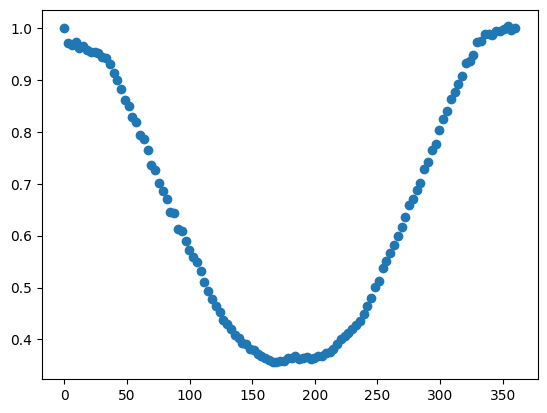

In [48]:
#### planarni kalibrace Optima


from dicom_file_separator import separate_dicom_file, separate_dicom_file_tomo
from tew_correction import tew_correction
from codes.custom_library import region_growing
from geom_prumer import geom_prumer
import numpy as np
from glob import glob
from pytomography.io.SPECT import dicom
from pytomography.transforms.SPECT import SPECTAttenuationTransform, SPECTPSFTransform
from pytomography.algorithms import OSEM
from pytomography.projectors.SPECT import SPECTSystemMatrix
from pytomography.likelihoods import PoissonLogLikelihood
from pytomography.utils import print_collimator_parameters

# kalibrace_folder = "KALIBRACE_20240815/Kalibrace_tomo_20240815_Optima"
# kalibrace_mds = sorted(glob(os.path.join(kalibrace_folder, 'Kalibrace*')))

kal_obraz_path = "KALIBRACE_20240815/Kalibrace_tomo_20240815_Optima/Kalibrace_tomo_1_20240815_Optima.dcm"
kal_obrazy = separate_dicom_file_tomo(kal_obraz_path)
# # plt.imshow(kal_obrazy["SC1"][0])

object_meta, proj_meta = dicom.get_metadata(kal_obraz_path, index_peak=0)
photopeak = dicom.get_projections(kal_obraz_path, index_peak=0)
scatter = dicom.get_energy_window_scatter_estimate(kal_obraz_path, index_peak=0, index_lower=1, index_upper=2)



pomer_pro_MD = []
prvni = np.sum(np.array(photopeak)[0])
pw = np.array(photopeak)
for i in range(120):
    pomer_pro_MD.append(np.sum(pw[i])/prvni)

print(pomer_pro_MD)

x = np.linspace(0,360,120)

plt.plot(x, pomer_pro_MD,"o")

# print(pydicom.read_file(kal_obraz_path).EnergyWindowInformationSequence)

# plt.figure(figsize=(7,6))
# plt.pcolormesh(photopeak[0].cpu().T, cmap='nipy_spectral')
# plt.axis('off')
# plt.colorbar(label='Counts')

# scatter.shape


# system_matrix = SPECTSystemMatrix(
#         obj2obj_transforms = [],
#         proj2proj_transforms = [],
#         object_meta = object_meta,
#         proj_meta = proj_meta)

# likelihood_PW = PoissonLogLikelihood(system_matrix, photopeak)
# likelihood_PW_SC = PoissonLogLikelihood(system_matrix, photopeak)

# reconstruction_algorithm_PW = OSEM(likelihood_PW)
# reconstruction_algorithm_PW_SC = OSEM(likelihood_PW_SC)

# reconstructed_object_PW = reconstruction_algorithm_PW(n_iters=4, n_subsets=8)
# reconstructed_object_PW_SC = reconstruction_algorithm_PW_SC(n_iters=4, n_subsets=8)

# idx_z = 61
# slice_pytomography_PW = reconstructed_object_PW.cpu()[:,:,idx_z].T
# slice_pytomography_PW_SC = reconstructed_object_PW_SC.cpu()[:,:,idx_z].T

# plt.subplots(1,3,)
# plt.subplot(131)
# plt.title('PW')
# plt.pcolormesh(slice_pytomography_PW , cmap='magma')
# plt.axis('off')
# plt.colorbar()
# plt.subplot(132)
# plt.title('PW a SC')
# plt.pcolormesh(slice_pytomography_PW_SC, cmap='magma')
# plt.axis('off')
# plt.colorbar()
# plt.subplot(133)
# plt.title('PW - SC')
# plt.pcolormesh(slice_pytomography_PW/slice_pytomography_PW_SC, cmap='magma')
# plt.axis('off')
# plt.colorbar()



In [ ]:
#### planarni kalibrace Optima


from dicom_file_separator import separate_dicom_file
from tew_correction import tew_correction
from codes.custom_library import region_growing
from geom_prumer import geom_prumer
import numpy as np
from glob import glob

kalibrace_folder = "KALIBRACE_20240815/Kalibrace_tomo_20240815_Optima"
kalibrace_mds = sorted(glob(os.path.join(kalibrace_folder, 'Kalibrace*')))

prah = 0.1

hlava_1_kal_faktory = []
hlava_1_tew_kal_faktory = []
hlava_2_kal_faktory = []
hlava_2_tew_kal_faktory = []
hlavy_gm = []
hlavy_gm_tew = []


for md in kalibrace_mds:
    image = separate_dicom_file(md)

    acq_time = image["Acq_time"]
    acq_date = image["Acq_date"]

    hlava_1 = image["Head1_EM"]
    hlava_1_tew = tew_correction(image["Head1_EM"], image["Head1_SC1"], image["Head1_SC2"])
    hlava_2 = image["Head2_EM"]
    hlava_2_tew = tew_correction(image["Head2_EM"], image["Head2_SC1"], image["Head2_SC2"])

    maska_1 = region_growing(hlava_1, prah*np.max(hlava_1))
    maska_1_tew = region_growing(hlava_1_tew, prah*np.max(hlava_1_tew))
    maska_2 = region_growing(hlava_2, prah*np.max(hlava_2))
    maska_2_tew = region_growing(hlava_2_tew, prah*np.max(hlava_2_tew))


    kal_faktor_1 = (np.sum(hlava_1*maska_1) / acq_time) / aktivity[acq_date]
    kal_faktor_1_tew = (np.sum(hlava_1_tew*maska_1_tew) / acq_time) / aktivity[acq_date]
    kal_faktor_2 = (np.sum(hlava_2*maska_2) / acq_time) / aktivity[acq_date]
    kal_faktor_2_tew = (np.sum(hlava_2_tew*maska_2_tew) / acq_time) / aktivity[acq_date]
    kal_faktor_gm = (geom_prumer(np.sum(hlava_1*maska_1), np.sum(hlava_2*maska_2)) / acq_time) / aktivity[acq_date]
    kal_faktor_gm_tew = (geom_prumer(np.sum(hlava_1_tew*maska_1_tew), np.sum(hlava_2_tew*maska_2_tew)) / acq_time) / aktivity[acq_date]


    hlava_1_kal_faktory.append(kal_faktor_1)
    hlava_1_tew_kal_faktory.append(kal_faktor_1_tew)
    hlava_2_kal_faktory.append(kal_faktor_2)
    hlava_2_tew_kal_faktory.append(kal_faktor_2_tew)
    hlavy_gm.append(kal_faktor_gm)
    hlavy_gm_tew.append(kal_faktor_gm_tew)

print(f"Anterior: {np.mean(hlava_1_kal_faktory)} +- {np.std(hlava_1_kal_faktory, ddof=1)}")
print(f"Anterior TEW: {np.mean(hlava_1_tew_kal_faktory)} +- {np.std(hlava_1_tew_kal_faktory, ddof=1)}")
print(f"Posterior: {np.mean(hlava_2_kal_faktory)} +- {np.std(hlava_2_kal_faktory, ddof=1)}")
print(f"Posterior TEW: {np.mean(hlava_2_tew_kal_faktory)} +- {np.std(hlava_2_tew_kal_faktory, ddof=1)}")
print(f"Geom. Mean: {np.mean(hlavy_gm)} +- {np.std(hlavy_gm, ddof=1)}")
print(f"Geom. Mean TEW: {np.mean(hlavy_gm_tew)} +- {np.std(hlavy_gm_tew, ddof=1)}")

In [21]:
#### planarni kalibrace Discovery


from dicom_file_separator import separate_dicom_file
from tew_correction import tew_correction
from codes.custom_library import region_growing
from geom_prumer import geom_prumer
import numpy as np
from glob import glob

kalibrace_folder = "KALIBRACE_20240815/Kalibrace_tomo_20240815_Discovery"
kalibrace_mds = sorted(glob(os.path.join(kalibrace_folder, 'Kalibrace*')))

prah = 0.1

hlava_1_kal_faktory = []
hlava_1_tew_kal_faktory = []
hlava_2_kal_faktory = []
hlava_2_tew_kal_faktory = []
hlavy_gm = []
hlavy_gm_tew = []


for md in kalibrace_mds:
    image = separate_dicom_file(md)

    acq_time = image["Acq_time"]
    acq_date = image["Acq_date"]

    hlava_1 = image["Head1_EM"]
    hlava_1_tew = tew_correction(image["Head1_EM"], image["Head1_SC1"], image["Head1_SC2"])
    hlava_2 = image["Head2_EM"]
    hlava_2_tew = tew_correction(image["Head2_EM"], image["Head2_SC1"], image["Head2_SC2"])

    maska_1 = region_growing(hlava_1, prah*np.max(hlava_1))
    maska_1_tew = region_growing(hlava_1_tew, prah*np.max(hlava_1_tew))
    maska_2 = region_growing(hlava_2, prah*np.max(hlava_2))
    maska_2_tew = region_growing(hlava_2_tew, prah*np.max(hlava_2_tew))


    kal_faktor_1 = (np.sum(hlava_1*maska_1) / acq_time) / aktivity[acq_date]
    kal_faktor_1_tew = (np.sum(hlava_1_tew*maska_1_tew) / acq_time) / aktivity[acq_date]
    kal_faktor_2 = (np.sum(hlava_2*maska_2) / acq_time) / aktivity[acq_date]
    kal_faktor_2_tew = (np.sum(hlava_2_tew*maska_2_tew) / acq_time) / aktivity[acq_date]
    kal_faktor_gm = (geom_prumer(np.sum(hlava_1*maska_1), np.sum(hlava_2*maska_2)) / acq_time) / aktivity[acq_date]
    kal_faktor_gm_tew = (geom_prumer(np.sum(hlava_1_tew*maska_1_tew), np.sum(hlava_2_tew*maska_2_tew)) / acq_time) / aktivity[acq_date]


    hlava_1_kal_faktory.append(kal_faktor_1)
    hlava_1_tew_kal_faktory.append(kal_faktor_1_tew)
    hlava_2_kal_faktory.append(kal_faktor_2)
    hlava_2_tew_kal_faktory.append(kal_faktor_2_tew)
    hlavy_gm.append(kal_faktor_gm)
    hlavy_gm_tew.append(kal_faktor_gm_tew)

print(f"Anterior: {np.mean(hlava_1_kal_faktory)} +- {np.std(hlava_1_kal_faktory, ddof=1)}")
print(f"Anterior TEW: {np.mean(hlava_1_tew_kal_faktory)} +- {np.std(hlava_1_tew_kal_faktory, ddof=1)}")
print(f"Posterior: {np.mean(hlava_2_kal_faktory)} +- {np.std(hlava_2_kal_faktory, ddof=1)}")
print(f"Posterior TEW: {np.mean(hlava_2_tew_kal_faktory)} +- {np.std(hlava_2_tew_kal_faktory, ddof=1)}")
print(f"Geom. Mean: {np.mean(hlavy_gm)} +- {np.std(hlavy_gm, ddof=1)}")
print(f"Geom. Mean TEW: {np.mean(hlavy_gm_tew)} +- {np.std(hlavy_gm_tew, ddof=1)}")

Anterior: 24.45827939530902 +- 0.11954275791842256
Anterior TEW: 18.875387017177665 +- 0.035376527133632395
Posterior: 8.589710806397132 +- 0.15095895906799414
Posterior TEW: 6.039889669721122 +- 0.023021265125908328
Geom. Mean: 14.494066117422 +- 0.1428101033878588
Geom. Mean TEW: 10.67729931174871 +- 0.01896807631177647
